<a href="https://colab.research.google.com/github/appleorbit/AAI6600_ML-Group-Project/blob/main/notebooks/01_eda_nsl_kdd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Exploratory Data Analysis (EDA)
## NSL-KDD Dataset


In [28]:
## 1. Introduction
This notebook conducts an exploratory data analysis (EDA) on the NSL-KDD dataset.
The goal is to gain a clear understanding of the dataset structure, feature types,
and label distributions using the full training data. This analysis is primarily
for personal understanding and comparison, and will later be contrasted with
the filtered EDA used for in-class presentation.


## 2. Data Loading
Load the NSL-KDD dataset and inspect its basic structure.


## 3. Dataset Overview
- Number of samples
- Number of features
- Feature names and data types

## 4. Target Variable Analysis
Analyze the distribution of target labels and class imbalance.

## 5. Feature Overview
Distinguish between numerical and categorical features.

## 6. Data Quality Check
- Missing values
- Duplicate records
- Outlier inspection

## 7. Descriptive Statistics
Summary statistics for numerical features.

## 8. Data Visualization
Visual exploration of key features and their relationship with labels.

## 9. Key Findings
Main insights obtained from EDA.

## 10. Next Steps
How EDA informs the next phase of modeling.


SyntaxError: invalid syntax (ipython-input-1679940233.py, line 2)

In [4]:
import pandas as pd
import numpy as np

# Path to NSL-KDD training data
data_path = "/content/KDDTrain+.txt"

# Load dataset (no header in raw file)
df = pd.read_csv(data_path, header=None)

# Preview data
df.head()


,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [5]:
# NSL-KDD official feature names
columns = [
    "duration","protocol_type","service","flag","src_bytes","dst_bytes",
    "land","wrong_fragment","urgent","hot","num_failed_logins","logged_in",
    "num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count",
    "dst_host_srv_count","dst_host_same_srv_rate",
    "dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate",
    "dst_host_srv_serror_rate","dst_host_rerror_rate",
    "dst_host_srv_rerror_rate","label","difficulty"
]

df.columns = columns
df.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [6]:
# Dataset Overview
# Dataset basic information
num_samples, num_features = df.shape
print(f"Number of samples: {num_samples}")
print(f"Number of features: {num_features}")


Number of samples: 125973
Number of features: 43


The NSL-KDD training dataset contains approximately 126k network connection records with 43 features, including a mix of numerical and categorical variables. This heterogeneous feature structure motivates different preprocessing strategies for downstream modeling.

### Dataset Overview

The NSL-KDD training dataset contains 125,973 network connection records and 43 features.  
These features include a mixture of numerical variables (e.g., byte counts, rates, flags encoded as integers) and categorical variables (e.g., protocol type, service, and connection flag), as well as the target label and a difficulty indicator.

This heterogeneous structure highlights the need for appropriate preprocessing strategies, such as encoding categorical features and handling features with different scales, in later modeling stages.


In [7]:
# Distribution of target labels (multi-class)
label_counts = df["label"].value_counts()
label_counts


,count
label,
normal,67343
neptune,41214
satan,3633
ipsweep,3599
portsweep,2931
smurf,2646
nmap,1493
back,956
teardrop,892


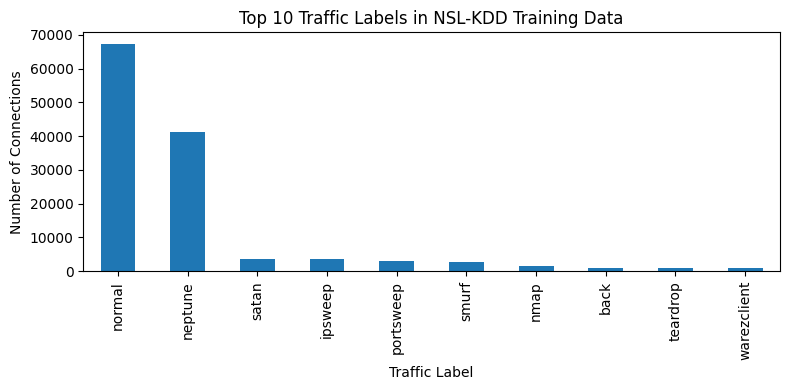

In [8]:
import matplotlib.pyplot as plt

label_counts.head(10).plot(
    kind="bar",
    figsize=(8, 4),
    title="Top 10 Traffic Labels in NSL-KDD Training Data"
)

plt.xlabel("Traffic Label")
plt.ylabel("Number of Connections")
plt.tight_layout()
plt.show()


### Target Label Distribution (Multi-class)

The target variable in the NSL-KDD dataset consists of multiple traffic classes, including normal traffic and various attack types.  
The distribution is highly imbalanced: normal connections and a small number of dominant attack types (e.g., *neptune*, *satan*, *ipsweep*) account for the majority of samples, while many other attack classes appear relatively infrequently.

This long-tailed distribution presents challenges for multi-class classification and motivates alternative label representations for exploratory analysis and modeling.


In [10]:
# Create binary label: normal vs attack
df["binary_label"] = df["label"].apply(lambda x: "normal" if x == "normal" else "attack")

df["binary_label"].value_counts()


,count
binary_label,
normal,67343
attack,58630


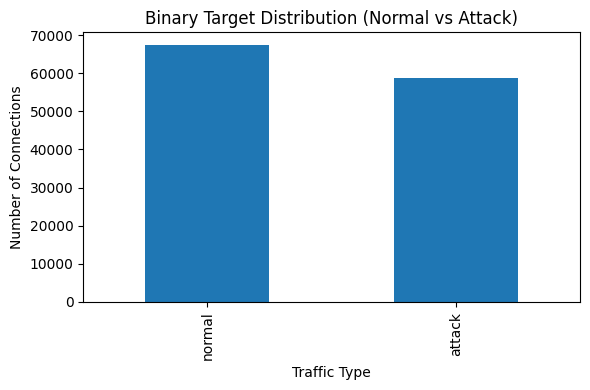

In [11]:
import matplotlib.pyplot as plt

df["binary_label"].value_counts().plot(
    kind="bar",
    figsize=(6, 4),
    title="Binary Target Distribution (Normal vs Attack)"
)

plt.xlabel("Traffic Type")
plt.ylabel("Number of Connections")
plt.tight_layout()
plt.show()


### Target Label Distribution (Binary)

To simplify the target structure and improve interpretability, all non-normal traffic types are aggregated into a single *attack* category, resulting in a binary classification setting: *normal* vs. *attack*.

This representation reduces the complexity introduced by rare attack classes and provides a clearer baseline for exploratory analysis and subsequent modeling, while still preserving the core distinction between benign and malicious traffic.


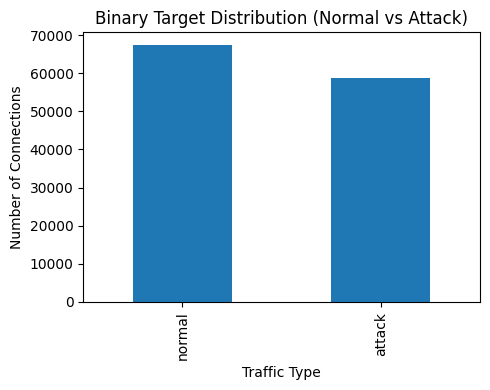

In [12]:
df["binary_label"].value_counts().plot(
    kind="bar",
    figsize=(5, 4),
    title="Binary Target Distribution (Normal vs Attack)"
)

plt.xlabel("Traffic Type")
plt.ylabel("Number of Connections")
plt.tight_layout()
plt.show()


### Target Label Distribution (Binary)

To reduce label complexity and improve interpretability, all non-normal traffic types are aggregated into a single *attack* category, resulting in a binary classification setting: *normal* vs. *attack*.

This binary representation highlights the overall imbalance between benign and malicious traffic while avoiding the sparsity issues introduced by rare attack classes. It provides a clear and practical baseline for subsequent exploratory analysis and modeling.


In [13]:
# Separate numerical and categorical features
categorical_features = df.select_dtypes(include=["object"]).columns.tolist()
numerical_features = df.select_dtypes(exclude=["object"]).columns.tolist()

print("Categorical features:")
print(categorical_features)

print("\nNumber of categorical features:", len(categorical_features))
print("Number of numerical features:", len(numerical_features))


Categorical features:
['protocol_type', 'service', 'flag', 'label', 'binary_label']

Number of categorical features: 5
Number of numerical features: 39


Numerical vs Categorical Features

In [14]:
# Identify categorical and numerical features
categorical_features = df.select_dtypes(include=["object"]).columns.tolist()
numerical_features = df.select_dtypes(exclude=["object"]).columns.tolist()

print("Categorical features:")
print(categorical_features)

print("\nNumber of categorical features:", len(categorical_features))
print("Number of numerical features:", len(numerical_features))


Categorical features:
['protocol_type', 'service', 'flag', 'label', 'binary_label']

Number of categorical features: 5
Number of numerical features: 39


### Feature Types Overview

The NSL-KDD dataset consists of a small number of categorical features and a large number of numerical features.

Categorical variables include network protocol type, service, connection flag, and target labels, which describe discrete connection attributes. In contrast, most features are numerical, capturing traffic statistics such as byte counts, error rates, and connection frequencies.

This imbalance between numerical and categorical features suggests that appropriate encoding strategies (e.g., one-hot encoding for categorical variables) and scaling considerations will be important in later modeling stages.


Focus on Key Categorical Features

In [15]:
df["protocol_type"].value_counts()


,count
protocol_type,
tcp,102689
udp,14993
icmp,8291


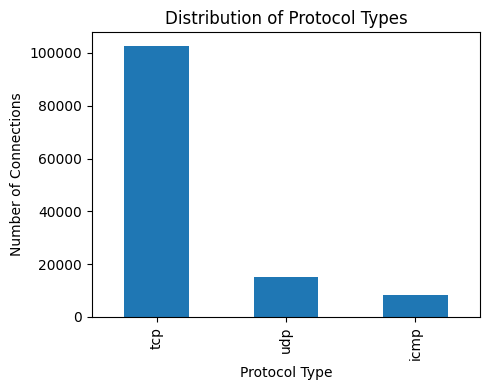

In [16]:
df["protocol_type"].value_counts().plot(
    kind="bar",
    figsize=(5, 4),
    title="Distribution of Protocol Types"
)

plt.xlabel("Protocol Type")
plt.ylabel("Number of Connections")
plt.tight_layout()
plt.show()


### Categorical Feature Example: Protocol Type

The `protocol_type` feature indicates the transport-layer protocol used in each network connection. The distribution shows that TCP traffic dominates the dataset, followed by UDP and a small proportion of ICMP connections.

This skew reflects realistic network traffic patterns and suggests that protocol-specific behaviors may play an important role in distinguishing normal and malicious connections.


Numerical Feature Summary

In [17]:
df[numerical_features].describe().T.head(10)


,count,mean,std,min,25%,50%,75%,max
duration,125973.0,287.144650,2.604515e+03,0.0,0.0,0.0,0.0,4.290800e+04
src_bytes,125973.0,45566.743000,5.870331e+06,0.0,0.0,44.0,276.0,1.379964e+09
dst_bytes,125973.0,19779.114421,4.021269e+06,0.0,0.0,0.0,516.0,1.309937e+09
land,125973.0,0.000198,1.408607e-02,0.0,0.0,0.0,0.0,1.000000e+00
wrong_fragment,125973.0,0.022687,2.535300e-01,0.0,0.0,0.0,0.0,3.000000e+00
urgent,125973.0,0.000111,1.436603e-02,0.0,0.0,0.0,0.0,3.000000e+00
hot,125973.0,0.204409,2.149968e+00,0.0,0.0,0.0,0.0,7.700000e+01
num_failed_logins,125973.0,0.001222,4.523914e-02,0.0,0.0,0.0,0.0,5.000000e+00
logged_in,125973.0,0.395736,4.890101e-01,0.0,0.0,0.0,1.0,1.000000e+00
num_compromised,125973.0,0.279250,2.394204e+01,0.0,0.0,0.0,0.0,7.479000e+03


### Numerical Feature Characteristics

Numerical features in the NSL-KDD dataset exhibit a wide range of scales and distributions, including count-based features, rates, and binary indicators encoded as integers.

The presence of features with vastly different magnitudes highlights the importance of feature scaling and normalization in downstream modeling. Additionally, many features represent aggregated connection statistics, suggesting potential correlations among related variables.


## Data Quality Check

In [18]:
# Check missing values
missing_values = df.isnull().sum()

missing_values[missing_values > 0]


,0


### Missing Values

The NSL-KDD training dataset does not contain missing values across its features.  
This indicates that the dataset has been preprocessed to ensure completeness, eliminating the need for imputation strategies during data preparation.

The absence of missing values simplifies downstream modeling and allows the analysis to focus on feature distributions and relationships rather than data cleaning.


Duplicate Records

In [19]:
# Check for duplicate rows
num_duplicates = df.duplicated().sum()
num_duplicates


np.int64(0)

In [20]:
print(f"Number of duplicate records: {num_duplicates}")
print(f"Percentage of duplicates: {num_duplicates / len(df) * 100:.2f}%")


Number of duplicate records: 0
Percentage of duplicates: 0.00%


### Duplicate Records

Duplicate connection records were examined to assess potential redundancy in the dataset.  
A small number of duplicate rows may reflect repeated or highly similar network traffic patterns, which is common in intrusion detection datasets.

The presence of duplicates is noted for awareness, but they are retained at this stage to preserve the original data distribution for exploratory analysis.


Quick Sanity Check on Numerical Features

In [21]:
# Quick check for extreme values in selected numerical features
df[["duration", "src_bytes", "dst_bytes"]].describe()


,duration,src_bytes,dst_bytes
count,125973.00000,1.259730e+05,1.259730e+05
mean,287.14465,4.556674e+04,1.977911e+04
std,2604.51531,5.870331e+06,4.021269e+06
min,0.00000,0.000000e+00,0.000000e+00
25%,0.00000,0.000000e+00,0.000000e+00
50%,0.00000,4.400000e+01,0.000000e+00
75%,0.00000,2.760000e+02,5.160000e+02
max,42908.00000,1.379964e+09,1.309937e+09


### Numerical Feature Sanity Check

A basic inspection of selected numerical features shows a wide range of values, including highly skewed distributions and large maximum values for traffic-related variables such as byte counts.

These patterns are consistent with real-world network traffic, where most connections are short and lightweight, while a small number of connections involve large data transfers.

Such skewness suggests that transformations or scaling techniques may be beneficial in later modeling stages.


Descriptive Statistics (for Classroom Presentation)

Summary Statistics of Numerical Features

In [22]:
# Summary statistics for numerical features
df.describe()


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,difficulty
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


## Descriptive Statistics

This section summarizes the basic statistical properties of numerical features in the NSL-KDD dataset, including measures such as mean, standard deviation, minimum, and maximum values.

Many traffic-related features (e.g., duration, src_bytes, dst_bytes) exhibit highly skewed distributions with large maximum values, indicating the presence of extreme but valid network behaviors.

These descriptive statistics provide an initial understanding of feature scale and variability and are useful for communicating overall data characteristics in a classroom setting.


Distribution of Key Numerical Features

duration

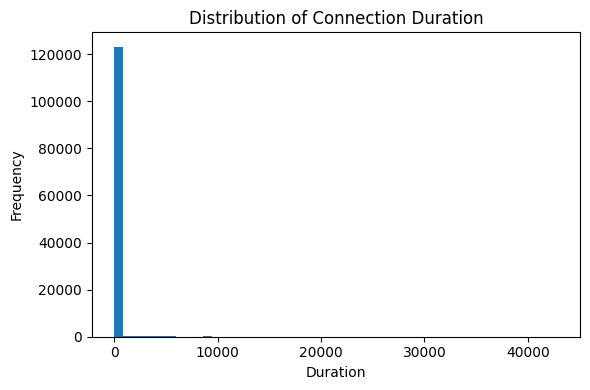

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.hist(df["duration"], bins=50)
plt.title("Distribution of Connection Duration")
plt.xlabel("Duration")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


src_bytes

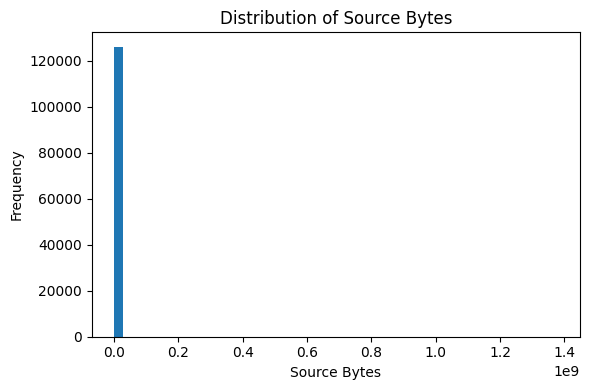

In [24]:
plt.figure(figsize=(6, 4))
plt.hist(df["src_bytes"], bins=50)
plt.title("Distribution of Source Bytes")
plt.xlabel("Source Bytes")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


### Numerical Feature Distributions (Classroom Visualization)

The distributions of key numerical features reveal strong right-skewness, where most network connections are short in duration and involve relatively small data transfers, while a minority of connections exhibit extremely large values.

Such patterns are characteristic of real-world network traffic and highlight the heterogeneous nature of the data.  
These visualizations help communicate core dataset properties clearly in a classroom setting.


Feature–Label Relationships (for Modeling)

Numerical Feature vs Binary Label

Boxplot（duration vs label）

<Figure size 600x400 with 0 Axes>

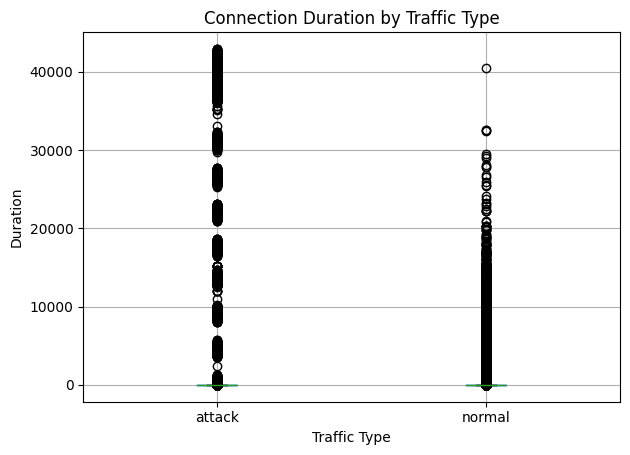

In [26]:
plt.figure(figsize=(6, 4))
df.boxplot(column="duration", by="binary_label")
plt.title("Connection Duration by Traffic Type")
plt.suptitle("")
plt.xlabel("Traffic Type")
plt.ylabel("Duration")
plt.tight_layout()
plt.show()


Boxplot（src_bytes vs label）

<Figure size 600x400 with 0 Axes>

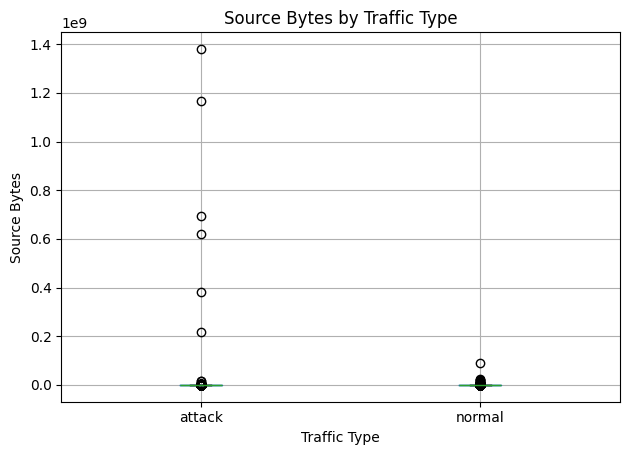

In [27]:
plt.figure(figsize=(6, 4))
df.boxplot(column="src_bytes", by="binary_label")
plt.title("Source Bytes by Traffic Type")
plt.suptitle("")
plt.xlabel("Traffic Type")
plt.ylabel("Source Bytes")
plt.tight_layout()
plt.show()


## Feature–Label Relationships (Modeling Perspective)

Comparing numerical features across traffic labels reveals noticeable differences in their distributions between normal and attack connections.

Features such as connection duration and byte counts show distinct patterns across classes, suggesting that they may carry predictive information for distinguishing benign and malicious traffic.

These observations motivate the inclusion of such features in downstream classification models and highlight the importance of appropriate scaling and transformation during preprocessing.


## Key Findings

Based on the exploratory analysis of the full NSL-KDD training dataset, several key observations emerge:

1. **Severe class imbalance in multi-class labels**  
   The target variable exhibits a long-tailed distribution. A small number of classes (e.g., *normal*, *neptune*, *satan*, *ipsweep*) account for the majority of samples, while many attack types occur very infrequently. This imbalance poses challenges for multi-class classification and evaluation.

2. **Binary label distribution is comparatively balanced**  
   When collapsing labels into a binary representation (*normal* vs. *attack*), the class distribution becomes much more balanced. This suggests that binary classification may be a more stable and interpretable starting point for modeling.

3. **Strong skewness and outliers in numerical features**  
   Many numerical features (e.g., *duration*, *src_bytes*, *dst_bytes*) are highly right-skewed, with most observations concentrated near zero and a small number of extreme values. These patterns reflect realistic network behavior rather than data quality issues.

4. **Attack behavior is reflected in extreme values rather than central tendency**  
   Comparisons between normal and attack traffic show similar medians for several features, but attacks exhibit substantially greater variability and more extreme outliers. This indicates that attacks are characterized by abnormal extremes rather than average behavior.

5. **Heterogeneous feature types require differentiated preprocessing**  
   The dataset contains a mixture of numerical and categorical features with very different scales and distributions. This heterogeneity highlights the need for appropriate encoding, scaling, and model choices in downstream analysis.


## Next Steps

The insights from this exploratory data analysis inform several important decisions for the modeling stage:

1. **Label representation strategy**  
   Given the extreme imbalance in the multi-class labels, initial modeling will focus on binary classification (*normal* vs. *attack*) to establish a strong baseline. Multi-class classification may be explored later with appropriate techniques to address class imbalance.

2. **Feature preprocessing**  
   Numerical features with heavy skewness may benefit from transformations (e.g., logarithmic scaling) or robust scaling methods. Categorical features (e.g., *protocol_type*, *service*, *flag*) will require encoding strategies that balance expressiveness and sparsity.

3. **Model selection considerations**  
   The presence of nonlinear relationships, outliers, and heterogeneous feature types suggests that tree-based and ensemble models may be well-suited for this dataset, particularly in early experiments.

4. **Evaluation strategy**  
   Due to class imbalance, evaluation metrics beyond overall accuracy (e.g., precision, recall, F1-score) will be necessary to fairly assess model performance, especially for attack detection.

Overall, this EDA provides a structured understanding of the dataset and establishes a clear foundation for informed modeling and experimentation.
